## Modèles

#### Regressions (linéaire et non linéaire), KNN, SVR

### Regression linéaire
<br>LinearRegression ajuste un modèle linéaire avec des coefficients w = (w1,…, wp) pour minimiser la somme <br> résiduelle des carrés entre les cibles observées dans le jeu de données et les cibles prédites par l'approximation linéaire.

In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt


2) Lire le fichier U_I.csv avec pandas 

In [2]:
#ouverture du fichier csv avec séparation des données par le ; 
data=pd.read_csv('U_I.csv',sep=';')


3) Pour chaque colonne dans le tableau de données, donner le nombre d'éléments, les valeurs max, min

In [3]:
#Affichage du nombre d'éléments, de l avaleur max et min de la tension U
print(len(data['U']),data['U'].max(),data['U'].min())
#Affichage du nombre d'éléments, de l avaleur max et min de la tension I
print(len(data['I']),data['I'].max(),data['I'].min())



100 400.0 10.0
100 50.01238216155669 7.874309119918944


4) Tracer I(U), sous forme de nuage de points

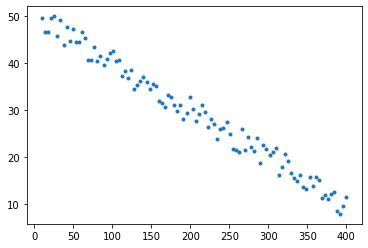

In [4]:
plt.plot(data['U'],data['I'],'.')
plt.show()

5) Séparer les deux collones du fichier en 4 listes de données X_train, X_test, Y_train, Y_test avec 80% pour train
   et 20% pour test en utilisant: from sklearn.model_selection import train_test_split

In [5]:
#Séparation des données en 4 listes avec des données test de 20%
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data['U'],data['I'],test_size=0.2)



6) Vérifier le pourcentage de la séparation. Afficher 5 élement de X_train à partir de l'élement 25. Comparer les avec ui_df['U'] 

In [14]:
print(len(X_train),len(X_test))
print(len(Y_train),len(Y_test))
print(X_train[25:30])
data[25:30]

#On voit donc que les 5 élements de Xtrain sont pris aléatoirement dans la base data

80 20
80 20
93    376.363636
17     76.969697
45    187.272727
8      41.515152
11     53.333333
Name: U, dtype: float64


,U,I
25,108.484848,40.625466
26,112.424242,37.249370
27,116.363636,38.378460
28,120.303030,36.845355
29,124.242424,38.621752


7) Redimensionner X_train,Y_train, X_test et Y_test en utilisant la méthode "reshape", e.g.
x_train=X_train.values.reshape(-1,1)

In [17]:
#Remise en forme des donées pour obtenir des matrices et plus des dataframes
u_train=X_train.values.reshape(-1,1)
i_train=Y_train.values.reshape(-1,1)
u_test=X_test.values.reshape(-1,1)
i_test=Y_test.values.reshape(-1,1)


<class 'pandas.core.series.Series'>
[[151.81818182]
 [372.42424242]
 [163.63636364]
 [400.        ]
 [159.6969697 ]
 [ 17.87878788]
 [313.33333333]
 [277.87878788]
 [234.54545455]
 [203.03030303]
 [120.3030303 ]
 [254.24242424]
 [297.57575758]
 [384.24242424]
 [ 45.45454545]
 [289.6969697 ]
 [112.42424242]
 [340.90909091]
 [ 92.72727273]
 [364.54545455]] <class 'numpy.ndarray'>


7) Tracer sur la même figure les nuages de points des données "train" et "test"

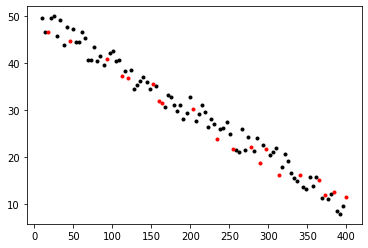

In [8]:
plt.plot(u_train,i_train,'k.')
plt.plot(u_test,i_test,'r.')
plt.show()

8) Entrainer un modèle de régression linéaire avec les données "train". Calculer les coefficients de détermination (R²) pour les données "train" et "test" respectivement
https://lexique.netmath.ca/coefficient-de-determination/

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

#entrainement du modèle avec les données d'entrainement
model.fit(u_train,i_train)

#Prédiction du résultat avec le modèle pour les données de test
i_predict=model.predict(u_test)

#Coefficient de détermination pour les données train et test avec le modèle ci-dessus
model.score(u_train,i_train), model.score(u_test,i_test)


(0.9789964526056005, 0.9761377669786149)

9) Tracer le nuage des points des données et tracer la droite donnée par le modèle

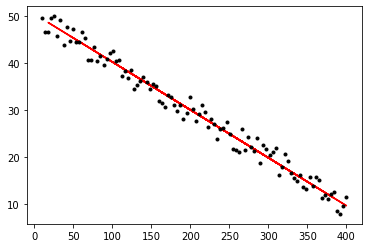

In [10]:
plt.plot(u_test,i_predict,'r')
plt.plot(data['U'],data['I'],'k.')
plt.show()

10) Vérifer la valeur de courant pour U=100V. Mettre ce point sur le graphique précédent

[[40.28018609]]
40.28018609494046


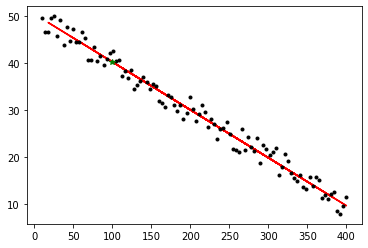

In [22]:
#1ère méthode : faire une prédiction du modèle pour le seul point U=100V
print(model.predict([[100.]]))

#2ème méthode : Calcul de pente et d'ordonée à l'origine pour avoir l'équation de courbe du modèle et l'évaluer en U=100V
pente=model.coef_[0,0]
y0=model.intercept_[0]
print(y0+pente*100)

plt.plot(u_test,i_predict,'r')
plt.plot(data['U'],data['I'],'k.')
plt.plot([100],[y0+pente*100],'g*')
plt.show()
